#### Models
***

In [1]:
def f(x,p):
    return p[0] + x * p[1]


#### Analysis
***

In [15]:
import pandas as pd
import seaborn as sns

# Load a dataset.
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/palmerpenguins/penguins.csv")
# Have a look at it.
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [16]:
penguins = df.drop(['Unnamed: 0','year'], axis=1)

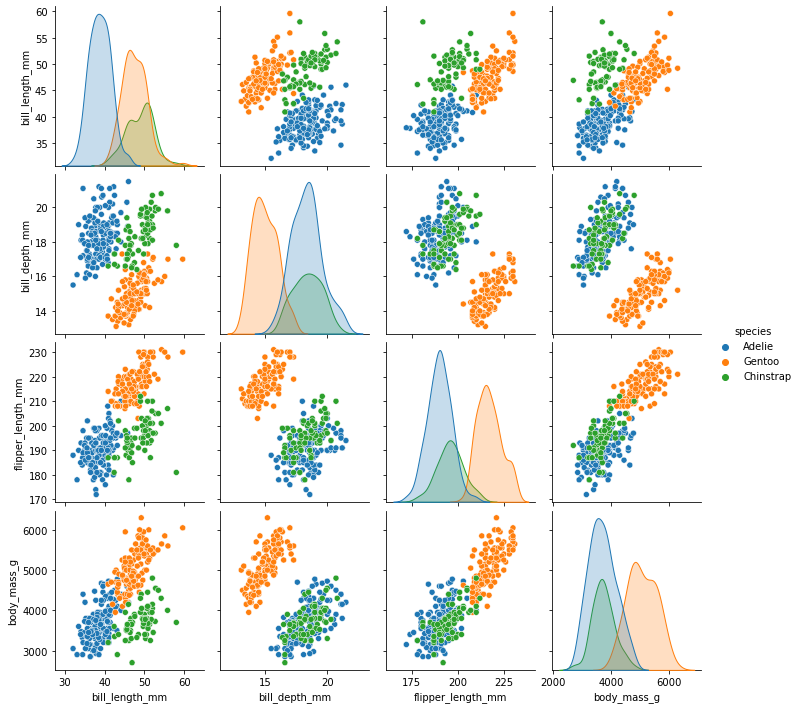

In [17]:
# Plot the dataset
sns.pairplot(penguins, hue="species");

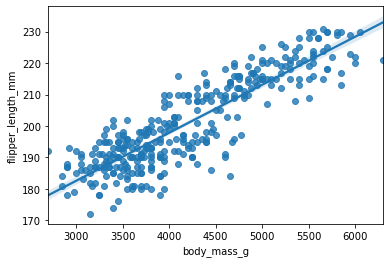

In [18]:
# Pick out two variables.
flipper = penguins[["body_mass_g", "flipper_length_mm"]].dropna()
# Scatter and fit line for just those two variables.
sns.regplot(x="body_mass_g", y="flipper_length_mm", data=penguins);


#### Train 
***

In [19]:
import sklearn.linear_model as lin

x = flipper["body_mass_g"].to_numpy()
y = flipper["flipper_length_mm"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)
r = model.score(x, y)
p = [model.intercept_, model.coef_[0]]

In [20]:
r, p

(0.7589925193571176, [136.72955927266202, 0.0152759156080373])


#### Predict
***

In [22]:
f(4500.0, p)

205.47117950882986